# Predicting Movie Success

## NOTE: Sources I used are marked with 'SRC' in comments

## Importing libraries
First, I will import all libraries that I will need:

In [1]:
import pandas as pd # for loading data
import numpy as np # for general calculations
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for extra detail in plotting
from sklearn.model_selection import train_test_split # for splitting data for deep learning
from sklearn.ensemble import RandomForestRegressor # for the Random Forest deep learning model
import pandas as pd # for replacing non-numerical values with numerical values
from sklearn.ensemble import AdaBoostRegressor # for the AdaBoost Regressor deep learning model
from sklearn.tree import DecisionTreeRegressor # for graphing with AdaBoost Regressor

## Loading data

Now, I will load my dataset into the notebook.

In [2]:
dataset = pd.read_csv('movies.csv')

In [3]:
dataset.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100


In [4]:
dataset.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
dataset.isna().sum() #check null values

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [6]:
dataset.dropna(axis=0,inplace=True)

In [7]:
finalData = dataset.reset_index(drop=True)

In [8]:
finalData.to_csv("movies.csv")

### Changing data types to numeric in order to perform calculations on them

In [9]:
finalData['genre'] = finalData['genre'].replace({'Drama': 0, 'Adventure': 1, 'Action': 2, 'Comedy': 3, 'Horror': 4, 'Biography': 5, 'Crime': 6, 'Fantasy': 7, 'Animation': 8, 'Family': 9, 'Western': 10, 'Sci-Fi': 11, 'Romance': 12, 'Thriller': 13, 'Mystery': 14})
finalData['rating'] = finalData['rating'].replace({'R': 0, 'PG': 1, 'G': 2, 'NC-17': 3, 'Approved': 4, 'Not Rated': 5, 'PG-13': 6, 'Unrated': 7, 'X': 8, 'TV-MA': 9})

In [10]:
finalData.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,0,0,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,0,1,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,1,2,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,1,3,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,0,3,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [11]:
finalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   int64  
 2   genre     5421 non-null   int64  
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   int64  
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 635.4+ KB


## Initial tests
First, I will create simple bar charts to display any obvious connections between the variables and box office success.

### Genre

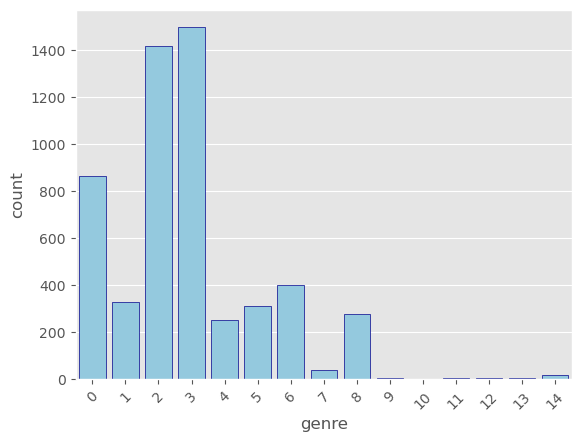

In [12]:
# NOTE: I DO NOT USE THIS IN MY REPORT, THIS WAS JUST FOR MY OWN UNDERSTANDING OF THE DATA

plt.style.use('ggplot') # for styling the graph

sns.countplot(x='genre', data=finalData, color='skyblue', ec='darkblue')

plt.xticks(rotation=45)

plt.show()


### Budget

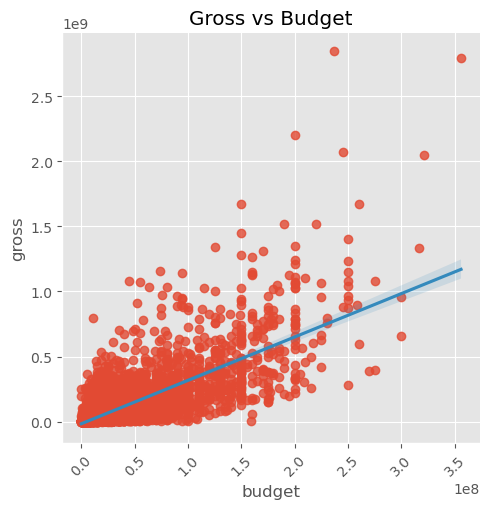

In [13]:
plt.style.use('ggplot')

sns.lmplot(x="budget", y="gross", data=finalData, line_kws={"color": "C1"}) #SRC [2]: https://seaborn.pydata.org/tutorial/regression.html

plt.title("Gross vs Budget")

plt.xticks(rotation=45)

plt.show() # NOTE ON THE SCALE: on the x axis, for example, 1.5 = 1.5*10^8

### Critical rating (score)

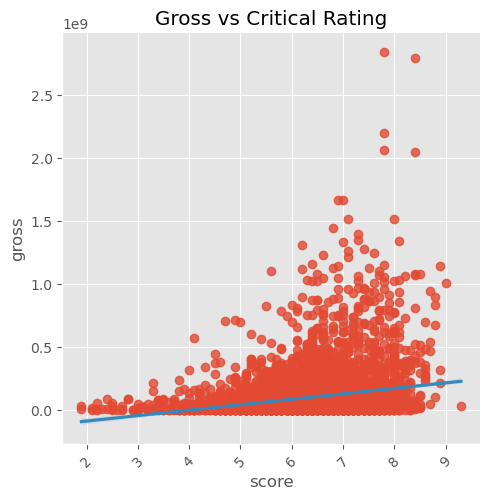

In [14]:
plt.style.use('ggplot')

sns.lmplot(x="score", y="gross", data=finalData, line_kws={"color": "C1"}) #SRC [2]: https://seaborn.pydata.org/tutorial/regression.html

plt.title("Gross vs Critical Rating")

plt.xticks(rotation=45)

plt.show() # 1.5 = NOTE: 1.5*10^8!!!

### Age rating

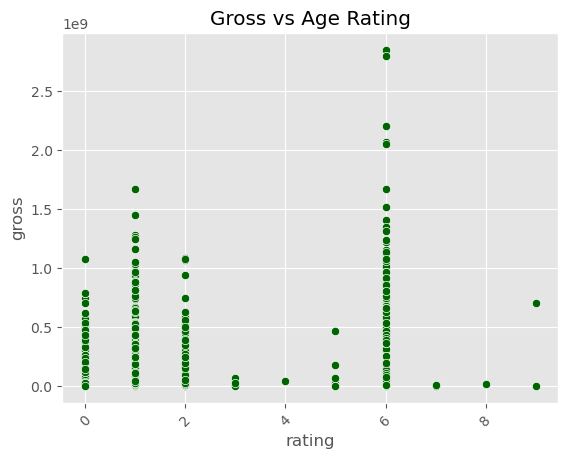

In [15]:
# NOTE: I DO NOT USE THIS IN MY REPORT, THIS WAS JUST FOR MY OWN UNDERSTANDING OF THE DATA

plt.style.use('ggplot')

sns.scatterplot(x='rating', y='gross', data=finalData, color='darkgreen') #SRC [3]: https://matplotlib.org/stable/tutorials/pyplot.html

plt.title("Gross vs Age Rating")

plt.xticks(rotation=45)
plt.show()

### Votes/popularity

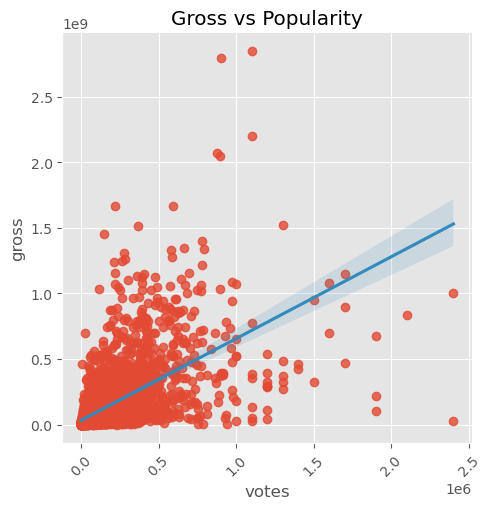

In [16]:
plt.style.use('ggplot')

sns.lmplot(x="votes", y="gross", data=finalData, line_kws={"color": "C1"}) #SRC [2]: https://seaborn.pydata.org/tutorial/regression.html

plt.title("Gross vs Popularity")

plt.xticks(rotation=45)

plt.show()

## Corrolation

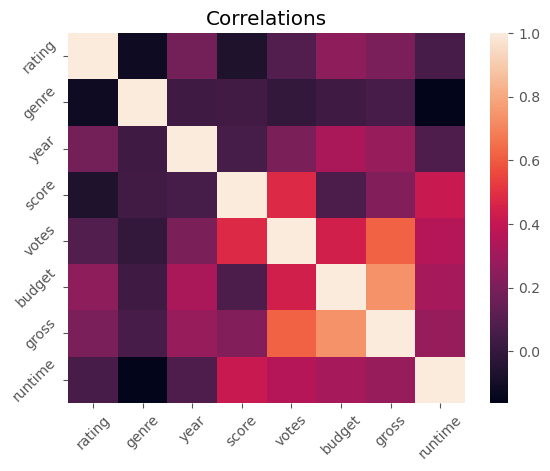

In [17]:
# SRC [8]: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
corr = finalData.corr()

sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title("Correlations")

plt.show()

## Machine learning

### Data splitting

In [18]:
# THE FOLLOWING (until next mention of 'SRC') IS FROM SRC [7]: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# note: the algorithm only takes np arrays

# value we want to predict
target = np.array(finalData['gross'])

# columns used to make the prediction (thus we drop everything we don't need)
features = finalData.drop(['name', 'year', 'released', 'director', 'writer', 'star', 'country', 'company', 'gross'], axis=1) # acis=1 refers to the columns

featureList = list(features.columns)

features = np.array(features)

In [19]:
# splitting of the data
trainFeatures, testFeatures, trainTarget, testTarget = train_test_split(features, target, test_size = 0.25, random_state = 42)

In [20]:
print('Training Features Shape:', trainFeatures.shape)
print('Training Target Shape:', trainTarget.shape)
print('Testing Features Shape:', testFeatures.shape)
print('Testing Target Shape:', testTarget.shape)

Training Features Shape: (4065, 6)
Training Target Shape: (4065,)
Testing Features Shape: (1356, 6)
Testing Target Shape: (1356,)


### Random Forest (only works for importance prediction)

In [21]:
# make an instance of the model with 1000 decision trees and a random state of 10
rf = RandomForestRegressor(n_estimators = 1000, random_state = 10)

# train model with training data
rf.fit(trainFeatures, trainTarget);

In [22]:
# run random forest regressor's predict method on testFeatures
predictions = rf.predict(testFeatures)

# absolute errors
errors = abs(predictions - testTarget)

# mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 47671352.3 degrees.


In [23]:
# mean absolute percentage error
meanAbsolutePercentageError = 100 * (errors / testTarget)

# calculate and display accuracy
accuracy = 100 - np.mean(meanAbsolutePercentageError)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -514.59 %.


### Importances using Random Forest

In [24]:
# use Random Forest's importance feature to get the importances
importances = list(rf.feature_importances_)

# tuples of variables and importances
featureImportances = [(feature, round(importance, 2)) for feature, importance in zip(featureList, importances)]

# sort featureImportances by most important first
featureImportances = sorted(featureImportances, key = lambda x: x[1], reverse = True)

# print variables and their importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in featureImportances];

Variable: budget               Importance: 0.55
Variable: votes                Importance: 0.29
Variable: score                Importance: 0.06
Variable: runtime              Importance: 0.06
Variable: genre                Importance: 0.03
Variable: rating               Importance: 0.02


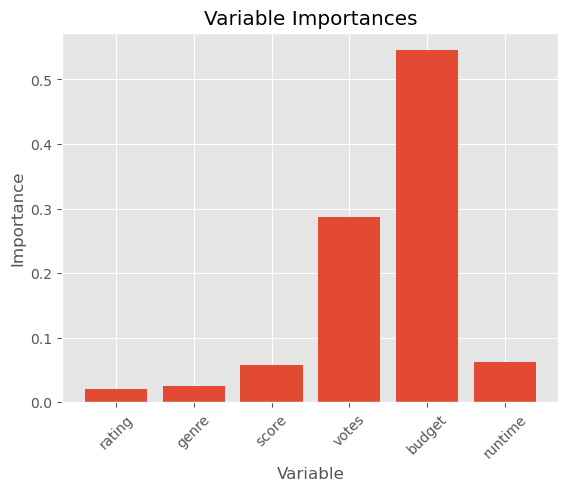

In [25]:
plt.style.use('ggplot')

# list of x locations for plotting, i.e. each importance value
xValues = list(range(len(importances)))

plt.bar(xValues, importances, orientation = 'vertical')

plt.xticks(xValues, featureList, rotation='45')

plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

plt.show()

### AdaBoost Regressor

In [26]:
# ADABOOST REGRESSION SRC [4]: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

# make an instance of the model with 1000 decision trees and a random state of 10
ada = AdaBoostRegressor(random_state=0, n_estimators=100)

# train model with training data
ada.fit(trainFeatures, trainTarget)

# make a prediction using the 6 variables I am using (rating, genre, score, votes, budget, runtime)
ada.predict([[0, 0, 0, 0, 0, 0]])

# the coefficient of determination of the prediction
ada.score(trainFeatures, trainTarget)

0.7062983125126565

Training Features Shape: (4065, 6)
Training Target Shape: (4065,)
[60000000. 18026148.  7000000. ... 43000000. 31000000.  1500000.]


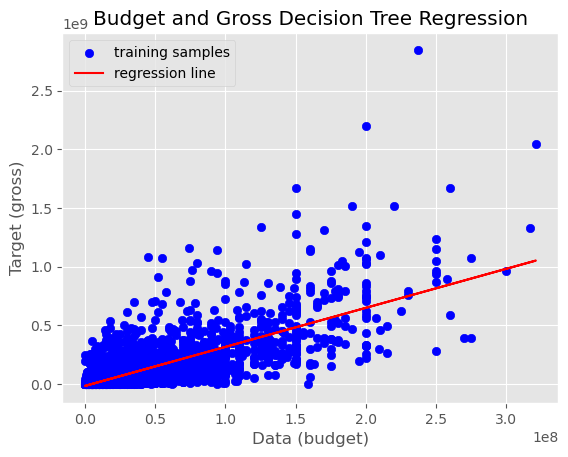

In [31]:
# GRAPHING ADABOOST REGRESSOR SRC [1]: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py

print('Training Features Shape:', trainFeatures.shape)
print('Training Target Shape:', trainTarget.shape)
print(trainFeatures[:,4])

# a scatter plot with deep learning data on budget ('trainFeatures[:.4]') plotted against gross ('trainTarget')
plt.scatter(trainFeatures[:,4], trainTarget, color='blue', label="training samples")

# REGRESSION LINE
m, b = np.polyfit(trainFeatures[:,4], trainTarget, 1) # had an error that said 'x and y must be the same size', I fixed this with SRC: https://stackoverflow.com/questions/41659535/valueerror-x-and-y-must-be-the-same-size
plt.plot(trainFeatures[:,4], m*trainFeatures[:,4] + b, color='red', label="regression line")

plt.xlabel("Data (budget)")
plt.ylabel("Target (gross)")
plt.title("Budget and Gross Decision Tree Regression")
plt.legend()
plt.show()